#### Import libraries & read in UKF output files

In [1]:
import numpy as np
import pandas as df
import matplotlib.pyplot as plt


In [54]:
data_path = 'output.txt'
dataset_1 = df.read_csv('output.txt')
dataset_1.dropna()

,CTE,steer-value,p-term,i-term,d-term
0,0.7598,-1.0000,0.7598,0.7598,0.7598
1,0.7598,-0.0723,0.7598,1.5196,0.0000
2,0.7598,-0.0724,0.7598,2.2794,0.0000
3,0.7598,-0.0725,0.7598,3.0392,0.0000
4,0.7598,-0.0726,0.7598,3.7990,0.0000
5,0.7598,-0.0726,0.7598,4.5588,0.0000
6,0.7598,-0.0727,0.7598,5.3186,0.0000
7,0.7598,-0.0728,0.7598,6.0784,0.0000
8,0.7598,-0.0729,0.7598,6.8382,0.0000
9,0.7599,-0.0731,0.7599,7.5981,0.0001


#### Analyze the NIS values

In [55]:
print(dataset_1.keys())

Index(['CTE', ' steer-value', ' p-term', ' i-term', ' d-term'], dtype='object')


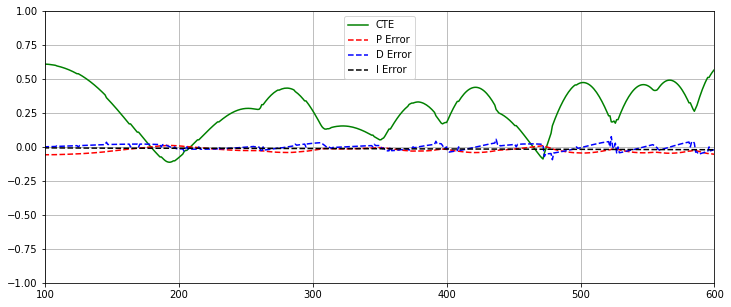

In [61]:
#Declare coefficients
Kp = 0.095
Ki = 0.0001
Kd = 1.7

#Plot and compare the NIS values
plt.figure(figsize = [12,5])
plt.plot(range(len(dataset_1)), dataset_1['CTE'], 'g', label = "CTE")
plt.plot(range(len(dataset_1)), -dataset_1[' p-term']*Kp, 'r--', label = "P Error")
plt.plot(range(len(dataset_1)), -dataset_1[' d-term']*Kd, 'b--', label = "D Error")
plt.plot(range(len(dataset_1)), -dataset_1[' i-term']*Ki, 'k--', label = "I Error")
plt.ylim(-1,1)
plt.xlim(100,600)
#plt.xlim(0,2730)
plt.grid()
plt.legend()
plt.savefig('./graphics/straight.png')
plt.show()